## Importando as Bibliotecas e lendo dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#lendo o dataset dado do RU
dataset = pd.read_csv('data_ru.csv',sep= ";" )
dataset_modificado = pd.read_csv('data_ru.csv',sep= ";" )

In [3]:
dataset.head(10)

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
5,2016-01-11,462,372
6,2016-01-12,575,435
7,2016-01-13,525,388
8,2016-01-14,545,341
9,2016-01-15,434,261


## Analise de estatisticas Descritivas

### Visão Geral

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1095 non-null   object
 1   lunch   1095 non-null   int64 
 2   dinner  1095 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.8+ KB


In [5]:
# Calcular as estatísticas descritivas para as colunas almoço e janta
estatistica_almoco = dataset['lunch'].describe()
estatistica_janta = dataset['dinner'].describe()


print("Estatísticas descritivas para a coluna 'lunch':")
print(estatistica_almoco)

print("\nEstatísticas descritivas para a coluna 'dinner':")
print(estatistica_janta)

Estatísticas descritivas para a coluna 'lunch':
count    1095.000000
mean      519.748858
std       312.016585
min         0.000000
25%       175.500000
50%       646.000000
75%       781.000000
max      1033.000000
Name: lunch, dtype: float64

Estatísticas descritivas para a coluna 'dinner':
count    1095.000000
mean      308.515982
std       226.023003
min         0.000000
25%         0.000000
50%       387.000000
75%       503.000000
max       714.000000
Name: dinner, dtype: float64


### Analisando Tendências 

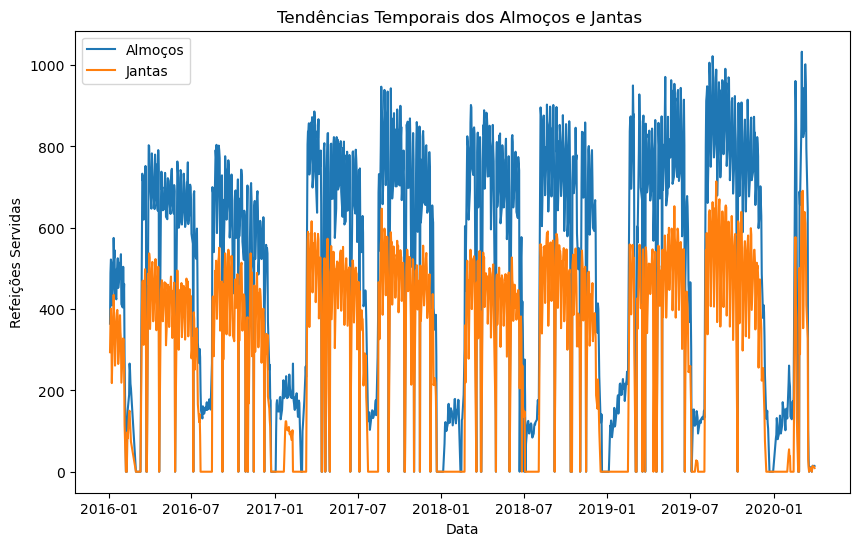

In [6]:
# Convertendo a coluna date para o tipo DateTime
dataset['date'] = pd.to_datetime(dataset['date'])

fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o número de almoços servidos e jantas servidos
ax.plot(dataset['date'], dataset['lunch'], label='Almoços')
ax.plot(dataset['date'], dataset['dinner'], label='Jantas')

# Configurando rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('Refeições Servidas')
ax.set_title('Tendências Temporais dos Almoços e Jantas ')
ax.legend()
plt.show()

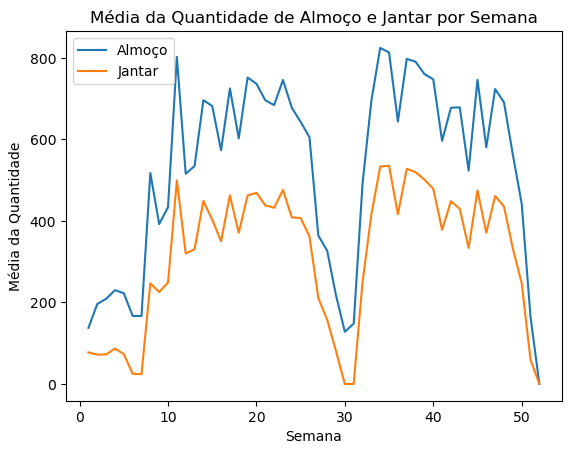

In [9]:
# Convertendo a coluna date para o tipo DateTime
dataset_modificado['date'] = pd.to_datetime(dataset_modificado['date'])

#Criando nova coluna para analisar por semana
dataset_modificado['week'] = dataset_modificado['date'].dt.isocalendar().week
weekly_mean = dataset_modificado.groupby('week')[['lunch', 'dinner']].mean()

weekly_mean.plot(kind='line')
plt.xlabel('Semana')
plt.ylabel('Média da Quantidade')
plt.title('Média da Quantidade de Almoço e Jantar por Semana')
plt.legend(['Almoço', 'Jantar'])
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_1808\240960457.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = dataset_modificado.groupby(dataset['date'].dt.to_period('M')).mean()


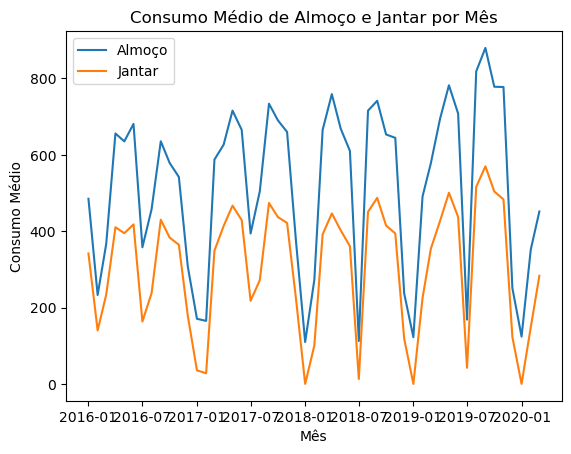

In [18]:
# Agrupar os dados por mês e calcular a média das quantidades de almoços e jantares
monthly_data = dataset_modificado.groupby(dataset['date'].dt.to_period('M')).mean()

# Converter o índice de período para o tipo DateTime
monthly_data.index = monthly_data.index.to_timestamp()

# Plotar o gráfico de linha
plt.plot(monthly_data.index, monthly_data['lunch'], label='Almoço')
plt.plot(monthly_data.index, monthly_data['dinner'], label='Jantar')

# Personalizar o gráfico
plt.xlabel('Mês')
plt.ylabel('Consumo Médio')
plt.title('Consumo Médio de Almoço e Jantar por Mês')
plt.legend()

# Exibir o gráfico
plt.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_14640\3933577027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_zero['diff'] = abs(dados_nao_zero['lunch'] - dados_nao_zero['dinner'])


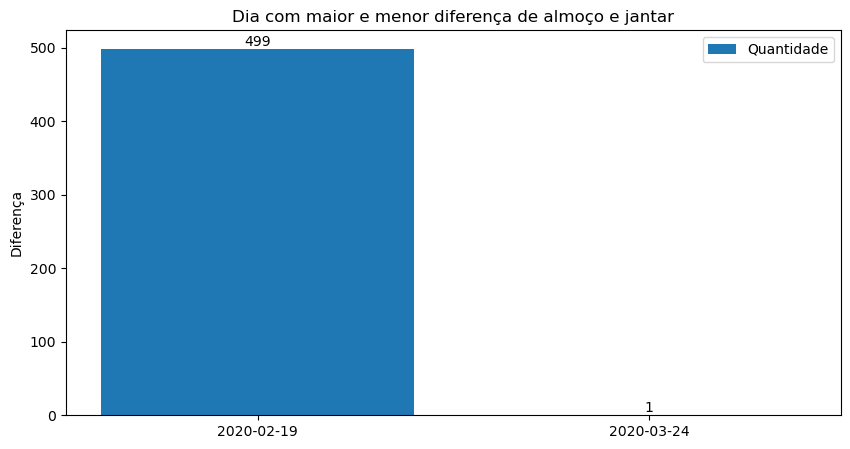

In [65]:
# Filtrar os dados para excluir dias que não foram servidos almoço ou janta
dados_nao_zero = dataset_modificado[(dataset_modificado['lunch'] != 0) & (dataset_modificado['dinner'] != 0)]

# Calcular a diferença entre as quantidades de almoço e jantar
dados_nao_zero['diff'] = abs(dados_nao_zero['lunch'] - dados_nao_zero['dinner'])

# Identificar o dia com a maior diferença e o dia com a menor diferença
max_diff_day = dados_nao_zero.loc[dados_nao_zero['diff'].idxmax(), 'date'].strftime("%Y-%m-%d")
min_diff_day = dados_nao_zero.loc[dados_nao_zero['diff'].idxmin(), 'date'].strftime("%Y-%m-%d")

max_diff = dados_nao_zero.loc[dados_nao_zero['date'] == max_diff_day, 'diff'].values[0]
min_diff = dados_nao_zero.loc[dados_nao_zero['date'] == min_diff_day, 'diff'].values[0]

plt.figure(figsize=(10, 5))

# Plotar as quantidades de almoço e jantar dos dias com maior e menor diferença
plt.bar([max_diff_day, min_diff_day], [dados_nao_zero.loc[dados_nao_zero['date'] == max_diff_day, 'diff'].values[0], dados_nao_zero.loc[dados_nao_zero['date'] == min_diff_day, 'diff'].values[0]])

# Adicionar rótulos às barras
plt.text(0, max_diff , str(max_diff), ha='center', va='bottom')
plt.text(1, min_diff , str(min_diff), ha='center', va='bottom')
    
plt.legend(['Quantidade'])
plt.title('Dia com maior e menor diferença de almoço e jantar')
plt.ylabel('Diferença')
plt.show()


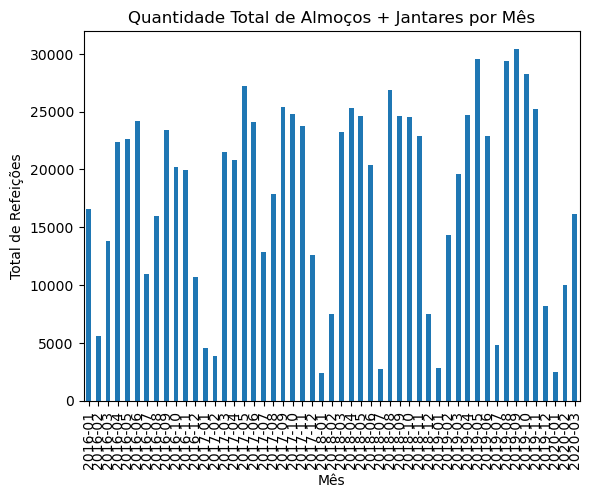

In [13]:
# Criar uma nova coluna com o mês
dataset_modificado['month'] = dataset['date'].dt.to_period('M')

# Calcular a quantidade total de almoços e jantares por mês
monthly_totals = dataset_modificado.groupby('month')[['lunch', 'dinner']].sum()

# Calcular a quantidade total de refeições por mês
monthly_totals['total_meals'] = monthly_totals['lunch'] + monthly_totals['dinner']

# Plotar o gráfico de barras com as quantidades totais de almoços + jantares por mês
monthly_totals['total_meals'].plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('Total de Refeições')
plt.title('Quantidade Total de Almoços + Jantares por Mês')
plt.xticks(rotation=90)
plt.show()

### Análise através de Histogramas

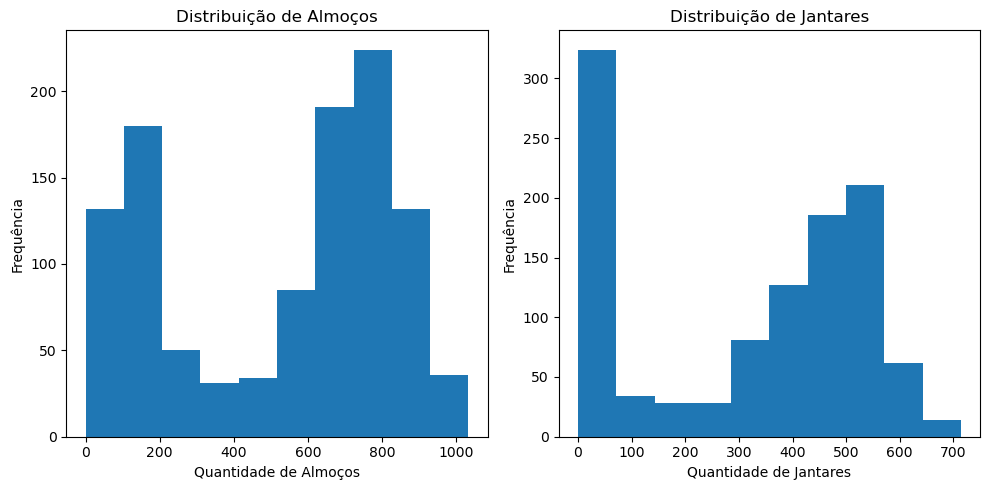

In [14]:
# Criar os histogramas
plt.figure(figsize=(10, 5))

# Histograma para a coluna "lunch"
plt.subplot(1, 2, 1)  # Define a posição do subplot
plt.hist(dataset['lunch'], bins=10)  # Plota o histograma
plt.xlabel('Quantidade de Almoços')
plt.ylabel('Frequência')
plt.title('Distribuição de Almoços')

# Histograma para a coluna "dinner"
plt.subplot(1, 2, 2)  # Define a posição do subplot
plt.hist(dataset['dinner'], bins=10)  # Plota o histograma
plt.xlabel('Quantidade de Jantares')
plt.ylabel('Frequência')
plt.title('Distribuição de Jantares')

plt.tight_layout()  # Ajusta o espaçamento entre os subplots
plt.show()

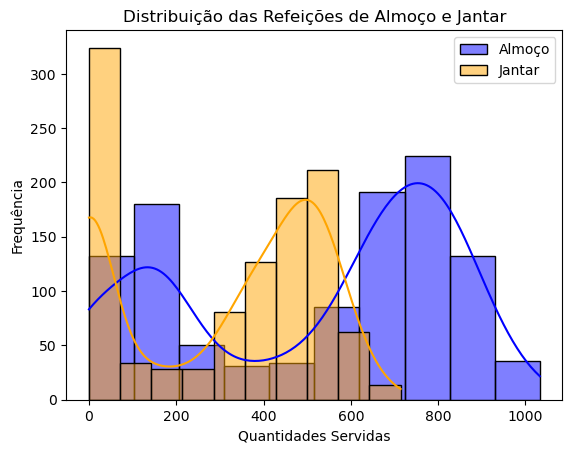

In [15]:
# Criar histograma para a coluna 'lunch'
sns.histplot(data=dataset, x='lunch', bins=10, kde=True, color='blue', label='Almoço')

# Criar histograma para a coluna 'dinner'
sns.histplot(data=dataset, x='dinner', bins=10, kde=True, color='orange', label='Jantar')

# Personalizar o gráfico
plt.xlabel('Quantidades Servidas')
plt.ylabel('Frequência')
plt.title('Distribuição das Refeições de Almoço e Jantar')
plt.legend()

# Exibir o gráfico
plt.show()

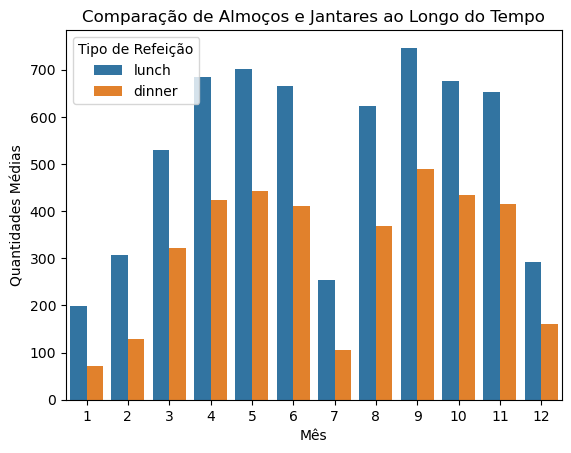

In [16]:
# Agrupar os dados por mês e calcular a média das quantidades de almoços e jantares
monthly_data = dataset_modificado.groupby(dataset['date'].dt.month)[['lunch', 'dinner']].mean().reset_index()

# Melt para o formato tidy
tidy_data = pd.melt(monthly_data, id_vars='date', var_name='Tipo de Refeição', value_name='Quantidade Média')

# Criar gráfico de barras agrupadas
sns.barplot(data=tidy_data, x='date', y='Quantidade Média', hue='Tipo de Refeição')

# Personalizar o gráfico
plt.xlabel('Mês')
plt.ylabel('Quantidades Médias')
plt.title('Comparação de Almoços e Jantares ao Longo do Tempo')

# Exibir o gráfico
plt.show()

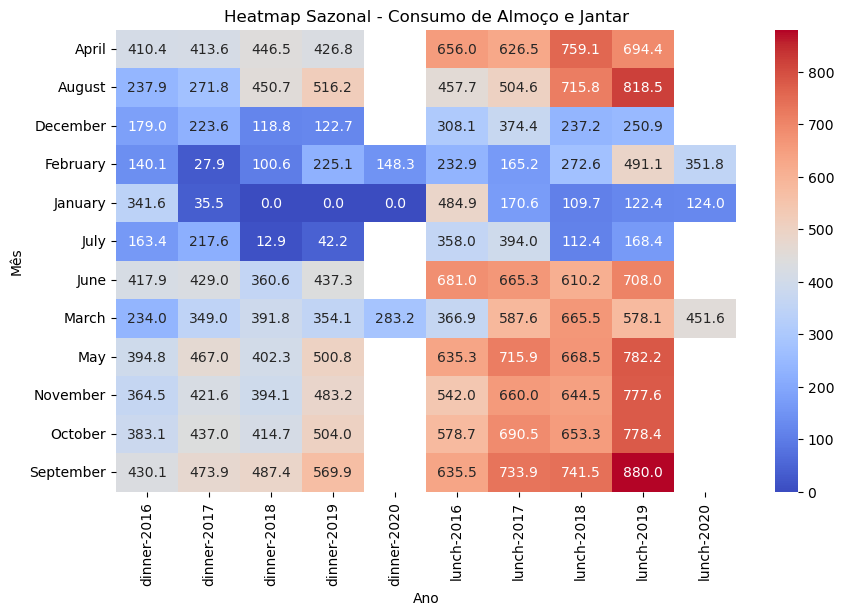

In [22]:
# Extrair o ano e o mês de cada data
dataset_modificado['year'] = dataset['date'].dt.year
dataset_modificado['month'] = dataset['date'].dt.month_name()

# Calcular a média do consumo de almoço e jantar para cada mês e ano
monthly_data = dataset_modificado.groupby(['year', 'month'])[['lunch', 'dinner']].mean()

# Reorganizar os dados em uma tabela pivot
pivot_table = monthly_data.pivot_table(index='month', columns='year', values=['lunch', 'dinner'])

# Plotar o heatmap sazonal
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")

# Personalizar o gráfico
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.title('Heatmap Sazonal - Consumo de Almoço e Jantar')
plt.show()

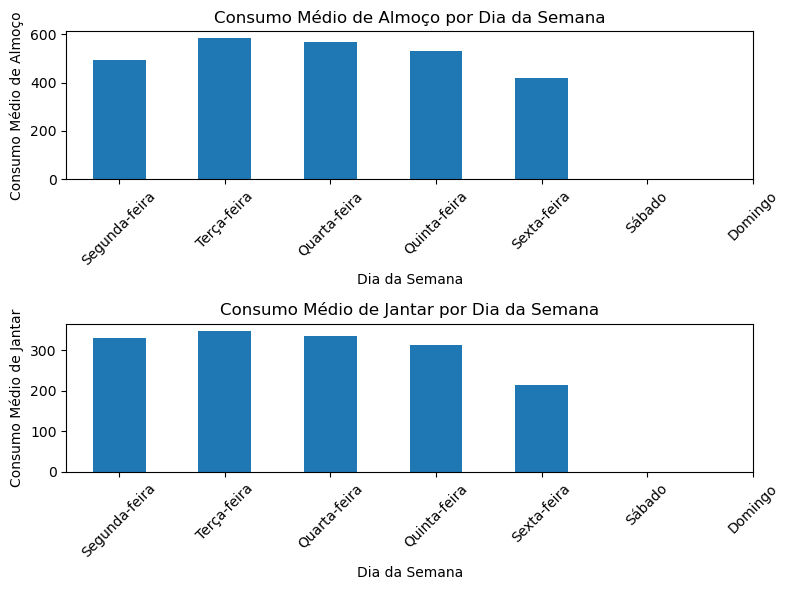

In [23]:
# Converter a coluna 'date' para o tipo DateTime e extrair o dia da semana
dataset_modificado['weekday'] = dataset['date'].dt.weekday

# Calcular a média do consumo de almoço e jantar para cada dia da semana
weekday_data = dataset_modificado.groupby('weekday')[['lunch', 'dinner']].mean()

# Mapear os nomes dos dias da semana para os números correspondentes
weekday_names = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Plotar os gráficos de barras para o consumo médio de almoço e jantar por dia da semana
fig, axes = plt.subplots(nrows=2, figsize=(8, 6))

weekday_data['lunch'].plot(kind='bar', ax=axes[0])
axes[0].set_xticks(range(len(weekday_names)))
axes[0].set_xticklabels(weekday_names, rotation=45)
axes[0].set_xlabel('Dia da Semana')
axes[0].set_ylabel('Consumo Médio de Almoço')
axes[0].set_title('Consumo Médio de Almoço por Dia da Semana')

weekday_data['dinner'].plot(kind='bar', ax=axes[1])
axes[1].set_xticks(range(len(weekday_names)))
axes[1].set_xticklabels(weekday_names, rotation=45)
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Consumo Médio de Jantar')
axes[1].set_title('Consumo Médio de Jantar por Dia da Semana')

plt.tight_layout()
plt.show()


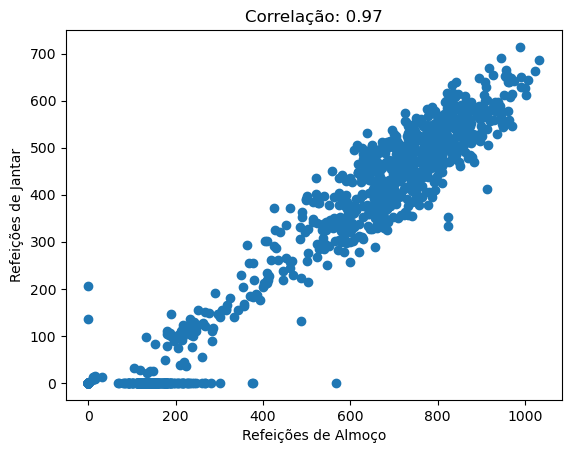

In [24]:
# Calcular o coeficiente de correlação entre o número de refeições de almoço e jantar
correlation = dataset['lunch'].corr(dataset['dinner'])

# Plotar o gráfico de dispersão entre o número de refeições de almoço e jantar
plt.scatter(dataset['lunch'], dataset['dinner'])
plt.xlabel('Refeições de Almoço')
plt.ylabel('Refeições de Jantar')
plt.title(f'Correlação: {correlation:.2f}')
plt.show()

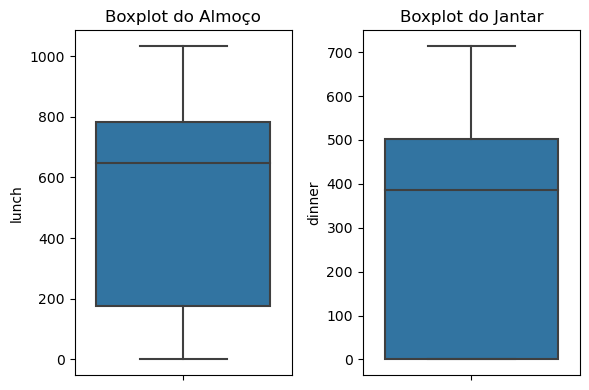

Outliers no Almoço:
Empty DataFrame
Columns: [date, lunch, dinner]
Index: []

Outliers no Jantar:
Empty DataFrame
Columns: [date, lunch, dinner]
Index: []


In [25]:
# Identificar os quartis para as colunas "lunch" e "dinner"
lunch_quartiles = dataset['lunch'].quantile([0.25, 0.5, 0.75])
dinner_quartiles = dataset['dinner'].quantile([0.25, 0.5, 0.75])

# Calcular os limites inferior e superior para identificar outliers
lunch_iqr = lunch_quartiles[0.75] - lunch_quartiles[0.25]
lunch_lower_limit = lunch_quartiles[0.25] - 1.5 * lunch_iqr
lunch_upper_limit = lunch_quartiles[0.75] + 1.5 * lunch_iqr

dinner_iqr = dinner_quartiles[0.75] - dinner_quartiles[0.25]
dinner_lower_limit = dinner_quartiles[0.25] - 1.5 * dinner_iqr
dinner_upper_limit = dinner_quartiles[0.75] + 1.5 * dinner_iqr

# Identificar outliers nas colunas "lunch" e "dinner"
lunch_outliers = dataset[(dataset['lunch'] < lunch_lower_limit) | (dataset['lunch'] > lunch_upper_limit)]
dinner_outliers = dataset[(dataset['dinner'] < dinner_lower_limit) | (dataset['dinner'] > dinner_upper_limit)]

# Plotar os boxplots das colunas "lunch" e "dinner"
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['lunch'])
plt.title('Boxplot do Almoço')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['dinner'])
plt.title('Boxplot do Jantar')

plt.tight_layout()
plt.show()

# Exibir os outliers identificados
print('Outliers no Almoço:')
print(lunch_outliers)

print('\nOutliers no Jantar:')
print(dinner_outliers)

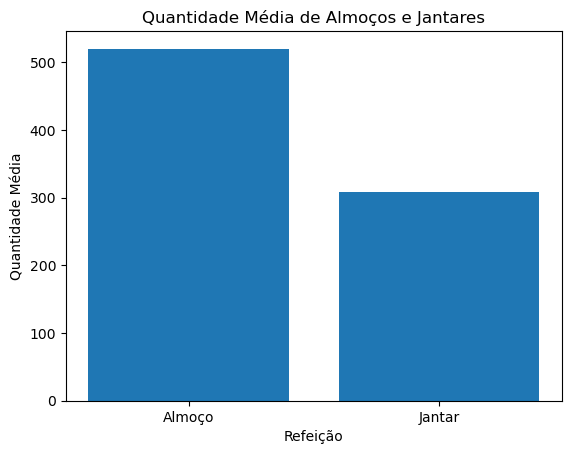

In [26]:
# Calcular a média das colunas "lunch" e "dinner"
mean_lunch = dataset['lunch'].mean()
mean_dinner = dataset['dinner'].mean()

# Plotar o gráfico de barras comparando a quantidade média de almoços e jantares
labels = ['Almoço', 'Jantar']
means = [mean_lunch, mean_dinner]

plt.bar(labels, means)
plt.xlabel('Refeição')
plt.ylabel('Quantidade Média')
plt.title('Quantidade Média de Almoços e Jantares')
plt.show()

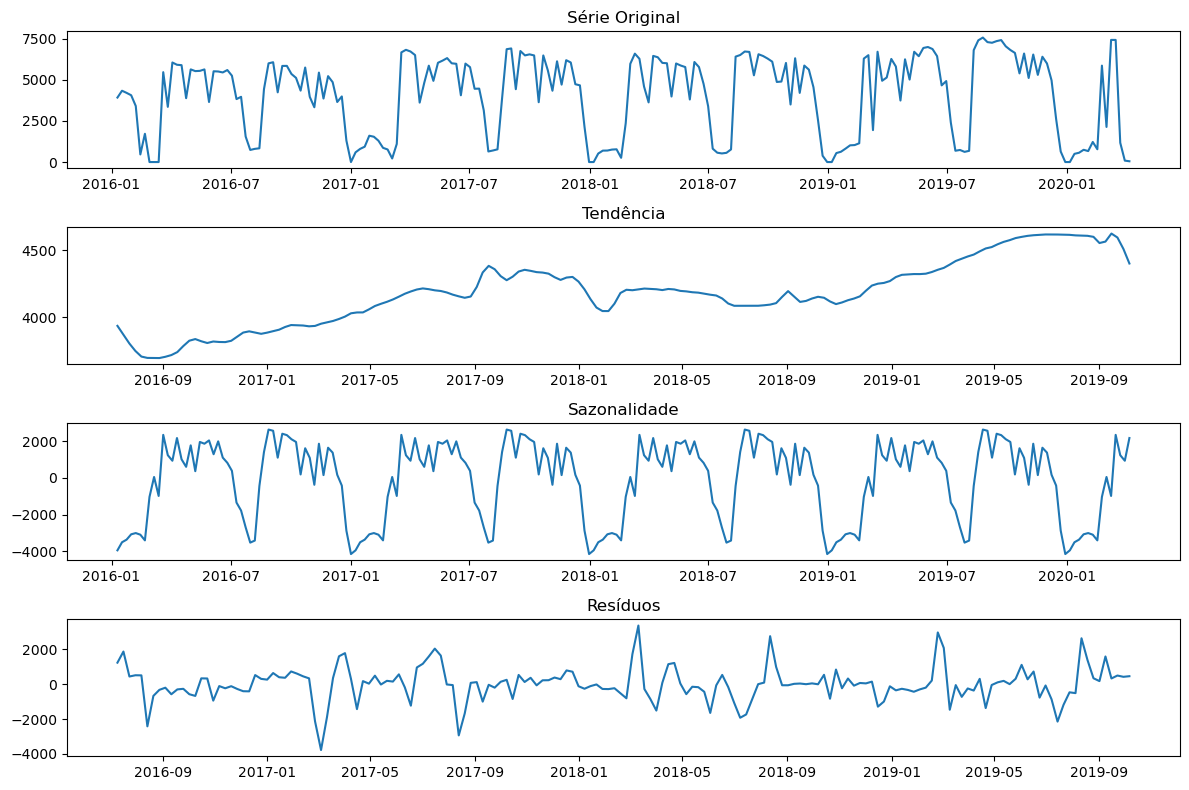

In [27]:
# Definir a coluna "date" como o índice
dataset.set_index('date', inplace=True)

# Resample do dataframe e preenchimento de semanas ausentes
resampled = dataset.resample('W').sum()

# Aplicar a decomposição sazonal
decomposition = seasonal_decompose(resampled['lunch'] + resampled['dinner'])

# Plotar os componentes da decomposição
fig, ax = plt.subplots(4, 1, figsize=(12, 8))

ax[0].set_title('Série Original')
ax[0].plot(resampled['lunch'] + resampled['dinner'])

ax[1].set_title('Tendência')
ax[1].plot(decomposition.trend)

ax[2].set_title('Sazonalidade')
ax[2].plot(decomposition.seasonal)

ax[3].set_title('Resíduos')
ax[3].plot(decomposition.resid)

plt.tight_layout()
plt.show()


In [66]:
feriados_br = [
    '01/01/2016',   # Ano Novo
    '19/03/2016',   # Dia de são José
    '25/03/2016',   # Data Magna Ceará
    '07/04/2016',   # Paixão de Cristo
    '21/04/2016',   # Dia de Tiradentes
    '01/05/2016',   # Dia do Trabalho
    '07/09/2016',   # Independência do Brasil
    '12/10/2016',   # Dia de Nossa Senhora Aparecida
    '02/11/2016',   # Dia de Finados
    '15/11/2016',   # Proclamação da República
    '25/12/2016',   # Natal
    '01/01/2017',   # Ano Novo
    '19/03/2017',   # Dia de são José
    '25/03/2017',   # Data Magna Ceará
    '07/04/2017',   # Paixão de Cristo
    '21/04/2017',   # Dia de Tiradentes
    '01/05/2017',   # Dia do Trabalho
    '07/09/2017',   # Independência do Brasil
    '12/10/2017',   # Dia de Nossa Senhora Aparecida
    '02/11/2017',   # Dia de Finados
    '15/11/2017',   # Proclamação da República
    '25/12/2017',   # Natal
    '01/01/2018',   # Ano Novo
    '19/03/2018',   # Dia de são José
    '25/03/2018',   # Data Magna Ceará
    '07/04/2018',   # Paixão de Cristo
    '21/04/2018',   # Dia de Tiradentes
    '01/05/2018',   # Dia do Trabalho
    '07/09/2018',   # Independência do Brasil
    '12/10/2018',   # Dia de Nossa Senhora Aparecida
    '02/11/2018',   # Dia de Finados
    '15/11/2018',   # Proclamação da República
    '25/12/2018',   # Natal
    '01/01/2019',   # Ano Novo
    '19/03/2019',   # Dia de são José
    '25/03/2019',   # Data Magna Ceará
    '07/04/2019',   # Paixão de Cristo
    '21/04/2019',   # Dia de Tiradentes
    '01/05/2019',   # Dia do Trabalho
    '07/09/2019',   # Independência do Brasil
    '12/10/2019',   # Dia de Nossa Senhora Aparecida
    '02/11/2019',   # Dia de Finados
    '15/11/2019',   # Proclamação da República
    '25/12/2019',   # Natal
    '01/01/2020',   # Ano Novo
    '19/03/2020',   # Dia de são José
    '25/03/2020',   # Data Magna Ceará
    '07/04/2020',   # Paixão de Cristo
    '21/04/2020',   # Dia de Tiradentes
]

feriados_br = pd.to_datetime(feriados_br, format='%d/%m/%Y')

In [67]:
# Adicionar coluna "feriado" preenchida com zeros no DataFrame "dataset"
dataset_modificado['feriado'] = 0
# Marcar os dias de feriado na coluna "feriado" do DataFrame "dataset"
dataset_modificado.loc[dataset_modificado['date'].isin(feriados_br), 'feriado'] = 1

In [68]:
# Agrupar os dados por semana e calcular a média das quantidades de refeições para cada semana
semanas = dataset_modificado.groupby(pd.Grouper(key='date', freq='W-MON')).agg({'lunch': 'mean', 'dinner': 'mean', 'feriado': 'max'})
# Filtrar apenas as semanas que têm pelo menos um dia de feriado
semanas_feriados = semanas[semanas['feriado'] > 0]

In [69]:
# Calcular a média das quantidades de refeições servidas nas semanas com feriado e sem feriado
media_refeicoes_com_feriado = semanas_feriados[['lunch', 'dinner']].mean().mean()
media_refeicoes_sem_feriado = semanas[~semanas.index.isin(semanas_feriados.index)][['lunch', 'dinner']].mean().mean()

# Comparar as médias das quantidades de refeições
if media_refeicoes_com_feriado < media_refeicoes_sem_feriado:
    print("A quantidade de refeições servidas diminui em semanas com feriado nacional.")
else:
    print("Não há uma diminuição significativa na quantidade de refeições servidas em semanas com feriado nacional.")


A quantidade de refeições servidas diminui em semanas com feriado nacional.


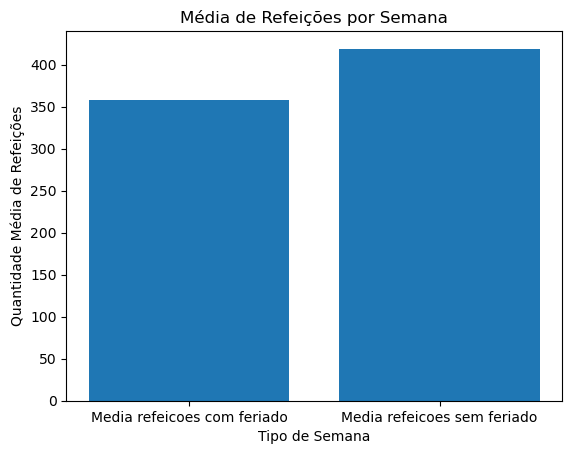

In [70]:
import matplotlib.pyplot as plt

# Plotar as médias de refeições por semana com e sem feriado
plt.bar(['Media refeicoes com feriado', 'Media refeicoes sem feriado'], [media_refeicoes_com_feriado, media_refeicoes_sem_feriado])
plt.title('Média de Refeições por Semana')
plt.xlabel('Tipo de Semana')
plt.ylabel('Quantidade Média de Refeições')
plt.show()